# 0. Install Dependencies and Bring in Data

In [5]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [6]:
df = pd.read_csv(os.path.join(r"C:\Users\varun\Downloads\CommentToxicity-main\jigsaw-toxic-comment-classification-challenge\train.csv\train.csv"))

In [7]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [8]:
df[df['toxic']==1].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
12,0005c987bdfc9d4b,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
16,0007e25b2121310b,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0


In [9]:
df.iloc[7]['comment_text']

"Your vandalism to the Matt Shirvington article has been reverted.  Please don't do it again, or you will be banned."

In [10]:
df[df.columns[2:]].iloc[7]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 7, dtype: int64

1.Preprocess

In [11]:
from tensorflow.keras.layers import TextVectorization

In [12]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [13]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [14]:
df['comment_text']

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [15]:
df[df.columns[2:]].values

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [16]:
MAX_FEATURES = 2000

In [17]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=180,
                               output_mode='int')

In [18]:
X = X.astype(str)

In [19]:
vectorizer.adapt(X.values)

In [20]:
vectorizer('Hello world life is great')[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([288, 263, 306,   9, 275], dtype=int64)>

In [21]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [22]:
vectorized_text = vectorizer(X.values)

In [23]:
len(X)

159571

In [24]:
vectorized_text

<tf.Tensor: shape=(159571, 180), dtype=int64, numpy=
array([[645,  76,   2, ...,   0,   0,   0],
       [  1,  54,   1, ...,   0,   0,   0],
       [425, 441,  70, ...,   0,   0,   0],
       ...,
       [  1,   1, 383, ...,   0,   0,   0],
       [  5,  12, 534, ...,   0,   0,   0],
       [  5,   8, 130, ...,   0,   0,   0]], dtype=int64)>

In [25]:
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(1600)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [26]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [27]:
batch_X.shape

(16, 180)

In [28]:
batch_y.shape

(16, 6)

In [29]:
int(len(dataset)*.7)

6981

In [30]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [31]:
train_generator = train.as_numpy_iterator()

In [32]:
train_generator.next()

(array([[ 34,  56, 145, ...,   0,   0,   0],
        [ 46, 185,  42, ...,   0,   0,   0],
        [  1, 683,   1, ...,   0,   0,   0],
        ...,
        [  5, 390,  68, ...,   0,   0,   0],
        [  8,  39,  65, ...,   0,   0,   0],
        [ 94, 238,   7, ...,   0,   0,   0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

# 2. Create Sequential Model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [34]:
y[0].shape

(6,)

In [35]:
model = Sequential()
model.add(Embedding(MAX_FEATURES+1, 32))
model.add(Bidirectional(LSTM(32, activation='tanh')))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

In [36]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          64032     
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [38]:
history = model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
6981/6981 [==============================] - 903s 127ms/step - loss: 0.0698 - val_loss: 0.0577
Epoch 2/10
6981/6981 [==============================] - 830s 119ms/step - loss: 0.0584 - val_loss: 0.0575
Epoch 3/10
6981/6981 [==============================] - 1144s 164ms/step - loss: 0.0556 - val_loss: 0.0553
Epoch 4/10
6981/6981 [==============================] - 993s 142ms/step - loss: 0.0528 - val_loss: 0.0560
Epoch 5/10
6981/6981 [==============================] - 982s 141ms/step - loss: 0.0504 - val_loss: 0.0556
Epoch 6/10
6981/6981 [==============================] - 877s 126ms/step - loss: 0.0483 - val_loss: 0.0569
Epoch 7/10
6981/6981 [==============================] - 883s 126ms/step - loss: 0.0466 - val_loss: 0.0625
Epoch 8/10
6981/6981 [==============================] - 931s 133ms/step - loss: 0.0447 - val_loss: 0.0575
Epoch 9/10
6981/6981 [==============================] - 883s 126ms/step - loss: 0.0432 - val_loss: 0.0599
Epoch 10/10
6981/6981 [======================

In [39]:
history.history

{'loss': [0.06980545818805695,
  0.058429110795259476,
  0.055593445897102356,
  0.052787672728300095,
  0.05038731172680855,
  0.04832066595554352,
  0.04657785966992378,
  0.04474562406539917,
  0.04319630563259125,
  0.04131331667304039],
 'val_loss': [0.05773300305008888,
  0.057533856481313705,
  0.055340465158224106,
  0.05596340447664261,
  0.05558652803301811,
  0.05692049860954285,
  0.06254233419895172,
  0.05749465525150299,
  0.05990435183048248,
  0.06740057468414307]}

In [40]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

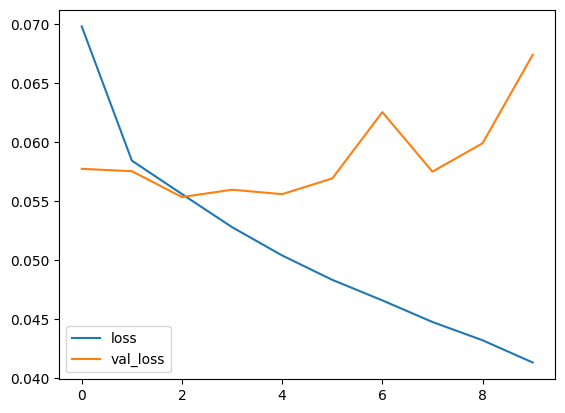

In [41]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# 3. Make Predictions

In [43]:
input_text = vectorizer("You freaking suck! I am going to hit you")

In [44]:
input_text

<tf.Tensor: shape=(180,), dtype=int64, numpy=
array([   7,    1,  397,    8,   74,  164,    3, 1522,    7,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
     

In [45]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [46]:
batch = test.as_numpy_iterator().next()

In [47]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [48]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [49]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 2s 2s/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [50]:
model.predict(np.array([input_text]))

1/1 [==============================] - 0s 103ms/step


array([[0.98704576, 0.14718497, 0.841177  , 0.0582261 , 0.86804026,
        0.1409325 ]], dtype=float32)

In [51]:
model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 0s 93ms/step


array([[0.98704576, 0.14718497, 0.841177  , 0.0582261 , 0.86804026,
        0.1409325 ]], dtype=float32)

In [52]:
res = model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 0s 63ms/step


In [53]:
res = model.predict(batch_X)

1/1 [==============================] - 0s 77ms/step


In [54]:
res.shape

(16, 6)

In [55]:
res

array([[7.11147914e-06, 6.54204044e-17, 1.07789951e-07, 1.11957946e-15,
        2.66049831e-08, 1.13890418e-10],
       [1.01505379e-04, 7.39590247e-13, 2.33941410e-06, 1.38109420e-11,
        1.03455113e-06, 1.17494643e-07],
       [9.21151870e-12, 0.00000000e+00, 2.79108939e-15, 0.00000000e+00,
        2.63344184e-16, 4.26502531e-28],
       [2.67555535e-01, 6.68899436e-03, 6.89064190e-02, 1.89938080e-02,
        8.42374861e-02, 5.45391664e-02],
       [1.85641227e-07, 6.34464574e-21, 1.24936628e-09, 9.40357661e-20,
        1.50411364e-10, 1.73208442e-12],
       [1.85534009e-04, 5.12635941e-11, 8.48859327e-06, 3.16202120e-10,
        1.72568946e-06, 1.15994681e-06],
       [3.33424978e-04, 3.57993107e-10, 2.47120879e-05, 1.01858533e-09,
        4.00115823e-06, 1.52039956e-06],
       [3.44767363e-06, 3.62547638e-17, 4.91943979e-08, 5.73282063e-16,
        7.72669217e-09, 3.44464512e-10],
       [1.59840574e-09, 2.91844655e-32, 2.28659995e-12, 8.05409468e-32,
        7.13931789e-13, 

# 4. Evaluate Model

In [56]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [57]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [58]:
for batch in test.as_numpy_iterator():
    X_true, y_true = batch
    yhat = model.predict(X_true)

    y_true = y_true.flatten()
    yhat = yhat.flatten()

    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 85ms/step


In [59]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.7544320225715637, Recall:0.6397550106048584, Accuracy:0.4172517657279968


# 5. Test and Gradio

In [60]:
!pip install gradio


In [61]:
import tensorflow as tf
import gradio as gr

c:\Users\varun\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [62]:
model.save('toxicity.h5')

c:\Users\varun\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [63]:
model = tf.keras.models.load_model('toxicity.h5')

In [64]:
input_str = vectorizer('hey i freaken hate you! i am coming to hunt you down!. I\'m going to hut you!')

In [65]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 1s 1s/step


In [66]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [67]:
res

array([[0.89616925, 0.01670546, 0.14707337, 0.06560554, 0.43598413,
        0.11575194]], dtype=float32)

In [68]:
df.columns[2:-1]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult'], dtype='object')

In [69]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)

    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)

    return text

In [71]:

interface = gr.Interface(fn=score_comment,
                         inputs=gr.Textbox(lines=2, placeholder='Comment to score'),
                         outputs='text')

In [ ]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://c85dedec74a04446d4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 75ms/step
